In [ ]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cities= pd.read_csv('city_day2.csv')
cities.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
cities

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
print(cities.shape)
cities['Date']=pd.to_datetime(cities['Date'])

(29531, 16)


            Proportion
Xylene        0.613220
PM10          0.377231
NH3           0.349734
Toluene       0.272290
Benzene       0.190410
AQI           0.158511
AQI_Bucket    0.158511
PM2.5         0.155701
NOx           0.141715
O3            0.136196
SO2           0.130507
NO2           0.121398
NO            0.121296
CO            0.069723
City          0.000000
Date          0.000000


<Axes: >

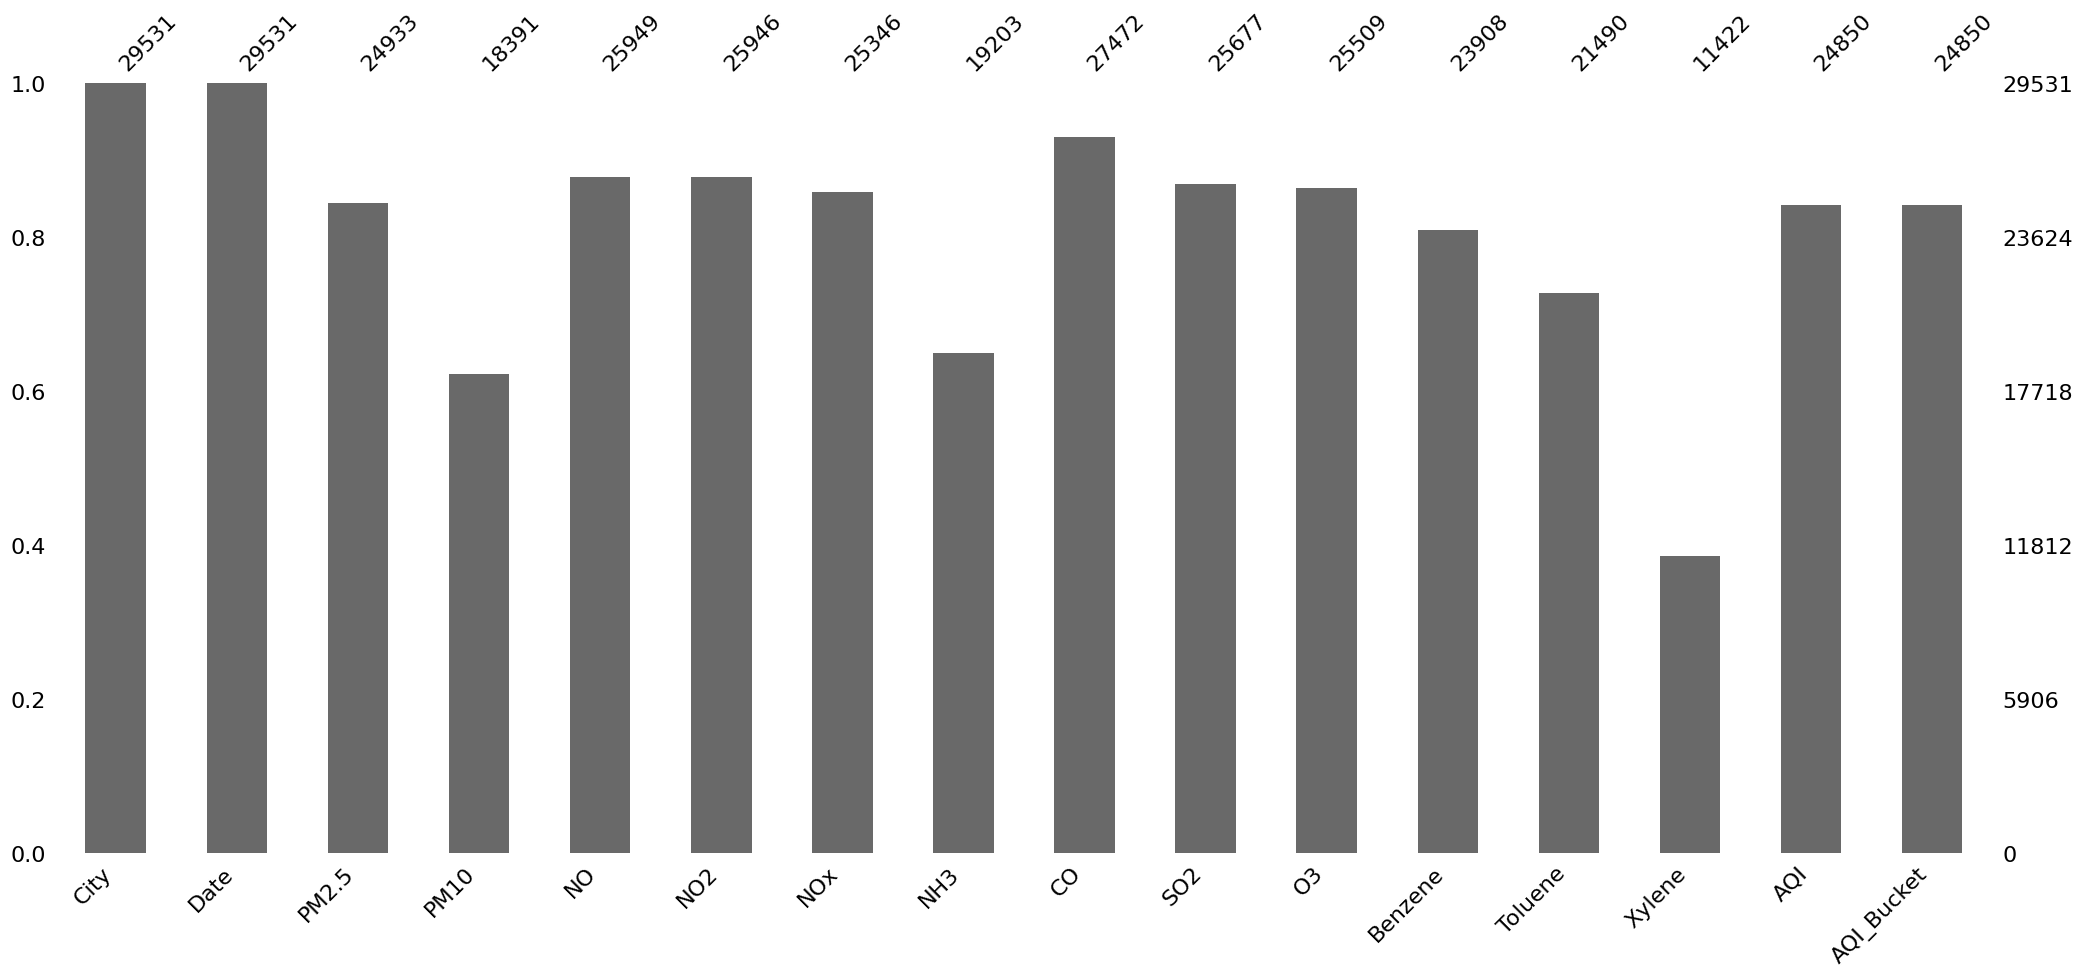

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

missing=pd.DataFrame(cities.isna().sum()/len(cities))
missing.columns=['Proportion']
print(missing.sort_values(by='Proportion', ascending=False))

msno.bar(cities)

In [ ]:
cities.fillna(0,inplace=True)

cities['year'] = pd.DatetimeIndex(cities['Date']).year
cities['month'] = pd.DatetimeIndex(cities['Date']).month

cities['PM']=cities['PM2.5'] + cities['PM10']

cities['Nitric']=cities['NO'] + cities['NO2']+ cities['NOx']

cities['BTX']=cities['Benzene'] + cities['Toluene']+ cities['Xylene']

cities_group_ym=cities.groupby(['City','year','month'])[['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']].mean()

cities_group_ym=cities_group_ym.reset_index(['City','year','month'])
cities_group_ym.head()

,City,year,month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
0,Ahmedabad,2015,1,10.668710,88.680000,22.352258,0.0,46.350645,43.602903,6.971613,33.903226
1,Ahmedabad,2015,2,103.662143,92.985714,19.482143,0.0,43.437857,56.423214,35.357143,464.857143
2,Ahmedabad,2015,3,106.905806,80.510000,13.585484,0.0,44.276774,56.975161,41.357419,378.064516
3,Ahmedabad,2015,4,101.682000,54.992667,7.306333,0.0,31.376000,51.233333,14.496333,257.200000
4,Ahmedabad,2015,5,74.919355,50.607419,8.529677,0.0,31.624194,35.977419,19.677419,254.967742


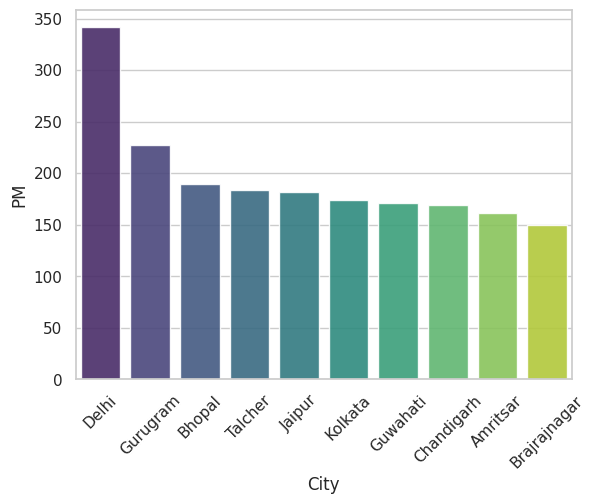

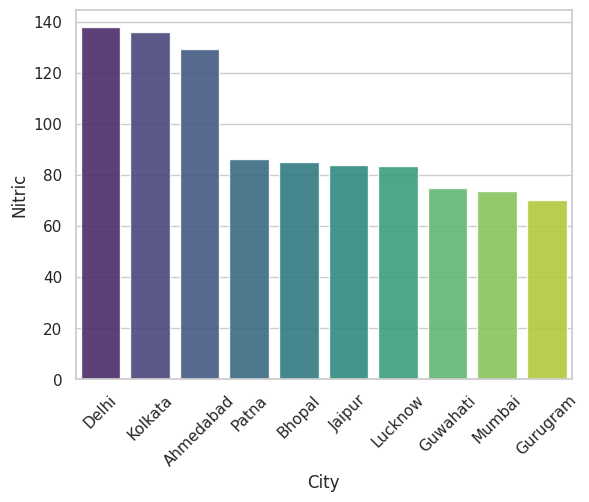

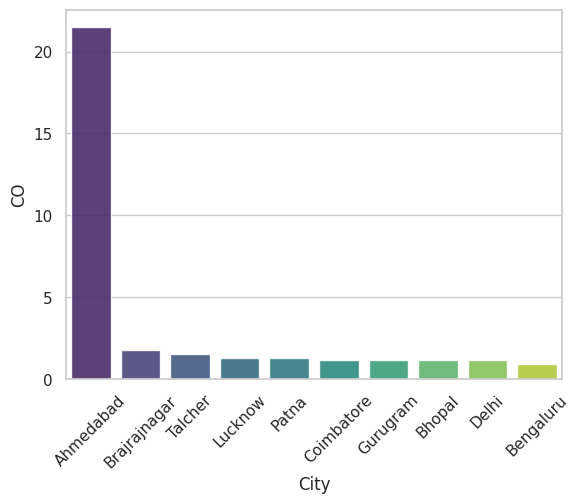

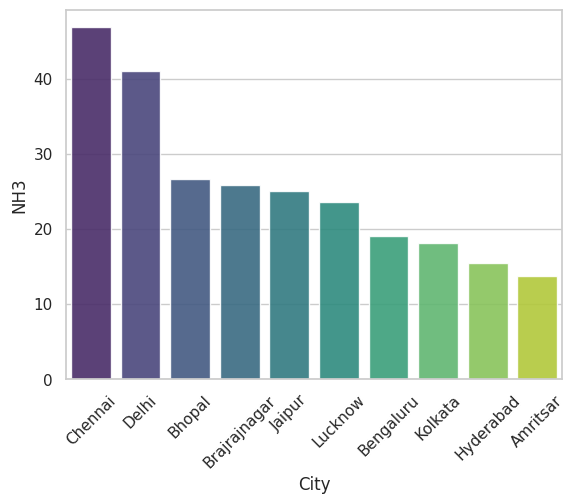

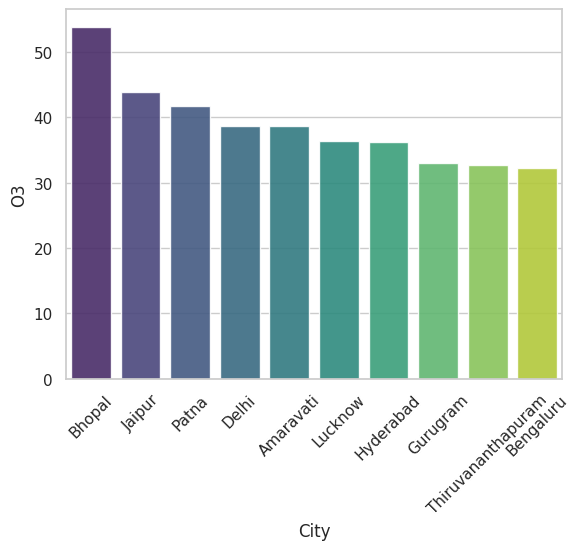

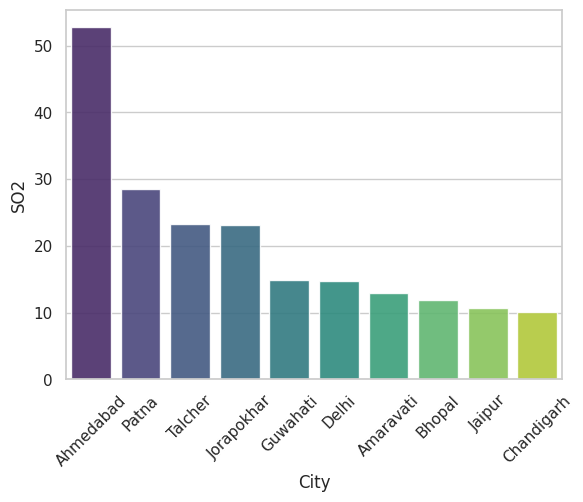

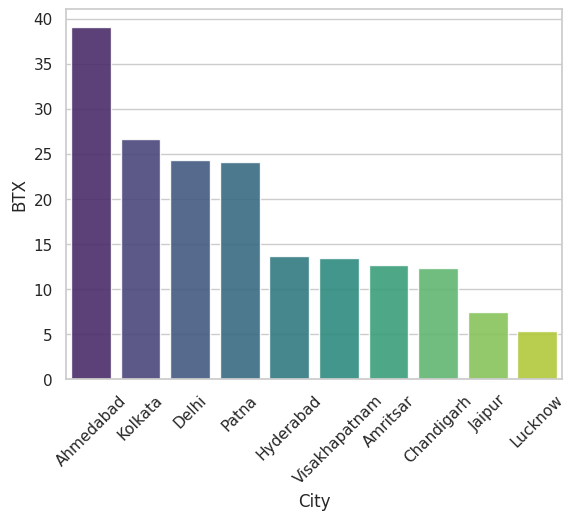

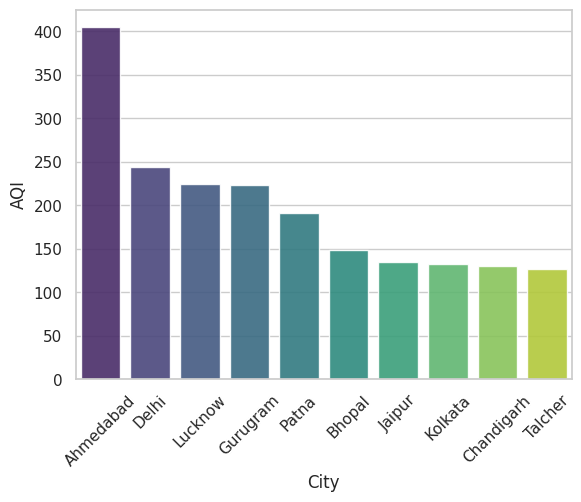

In [ ]:
cities_17_19=cities_group_ym[cities_group_ym['year'].isin([2017,2018,2019])]
pollutants=['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']
sns.set_theme(style='whitegrid')

for i in pollutants:
    df=cities_17_19.groupby(['City'])[[i]].mean().sort_values(i,ascending=False).iloc[:10,:]
    
    df=df.reset_index(['City'])

    plt.figure()
    sns.barplot(data=df, x="City", y=i, palette="viridis", alpha=.9)
    plt.xticks(rotation=45) 

              PM    Nitric        CO       NH3        O3       SO2       BTX  \
PM      1.000000  0.626912 -0.001708  0.273868  0.414142  0.194107  0.170518   
Nitric  0.626912  1.000000  0.351381  0.205231  0.336590  0.398588  0.297628   
CO     -0.001708  0.351381  1.000000 -0.107090  0.112073  0.658116  0.342239   
NH3     0.273868  0.205231 -0.107090  1.000000  0.184410 -0.089157  0.016164   
O3      0.414142  0.336590  0.112073  0.184410  1.000000  0.298710  0.207562   
SO2     0.194107  0.398588  0.658116 -0.089157  0.298710  1.000000  0.339907   
BTX     0.170518  0.297628  0.342239  0.016164  0.207562  0.339907  1.000000   
AQI     0.589689  0.660347  0.672568  0.088668  0.404758  0.591202  0.348172   

             AQI  
PM      0.589689  
Nitric  0.660347  
CO      0.672568  
NH3     0.088668  
O3      0.404758  
SO2     0.591202  
BTX     0.348172  
AQI     1.000000  


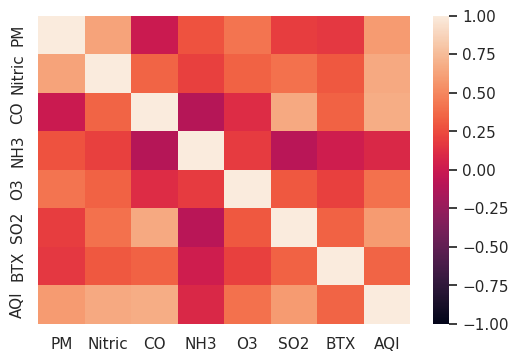

In [ ]:
corr_matrix = cities_group_ym.iloc[:,3:].corr()
print(corr_matrix)
fig = plt.figure(figsize = (6, 4))
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.show()

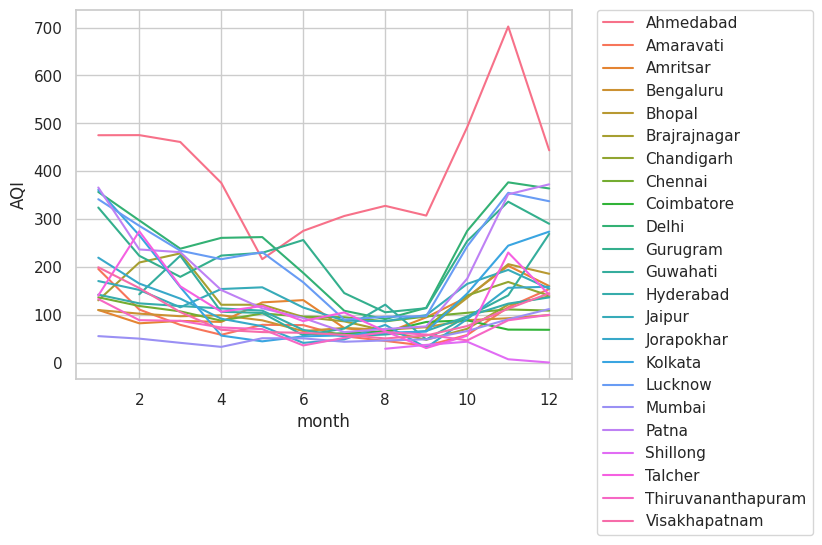

In [ ]:
df_AQI_trend= cities_17_19.groupby(['City','month'])[['AQI']].mean().reset_index()

sns.lineplot(
    data=df_AQI_trend,
    x="month", y="AQI",hue='City'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='month', ylabel='AQI Percentage change'>

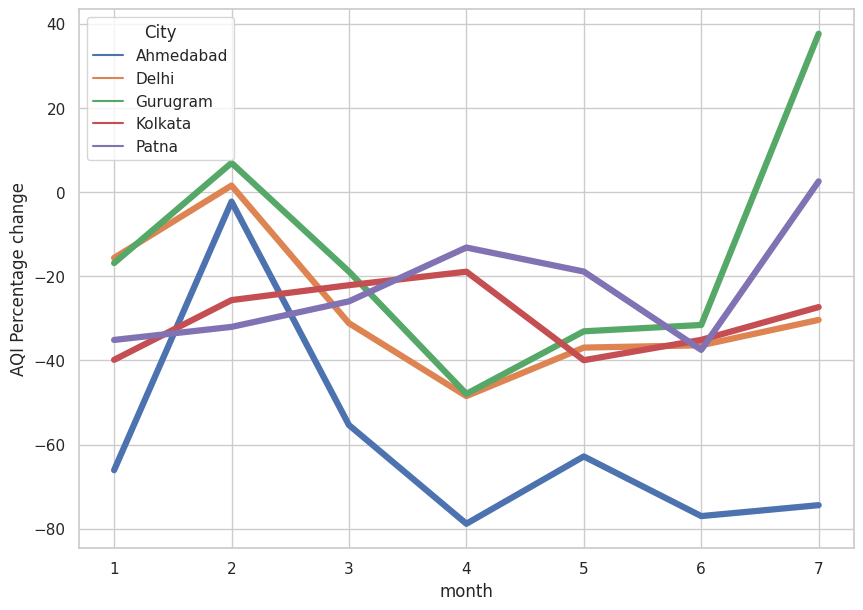

In [ ]:
most_polluted=['Delhi','Patna','Ahmedabad','Gurugram','Kolkata']

cities_2019= cities_group_ym[(cities_group_ym['City'].isin(most_polluted)) & (cities_group_ym['year']==2019)]
cities_2020= cities_group_ym[(cities_group_ym['City'].isin(most_polluted)) & (cities_group_ym['year']==2020)]

cities_19_vs_20 = pd.merge(cities_2019, cities_2020, how="inner", on=["City", "month"])

cities_19_vs_20['AQI Percentage change']=100*(cities_19_vs_20['AQI_y']-cities_19_vs_20['AQI_x'])/cities_19_vs_20['AQI_x']

fig = plt.figure(figsize=(10,7))
sns.lineplot(
    data=cities_19_vs_20,
    x="month", y="AQI Percentage change",hue='City',linewidth=4.5,
    markers=True, dashes=False
)


## Cities which had underwent the most drastic improvement in Air Quality:

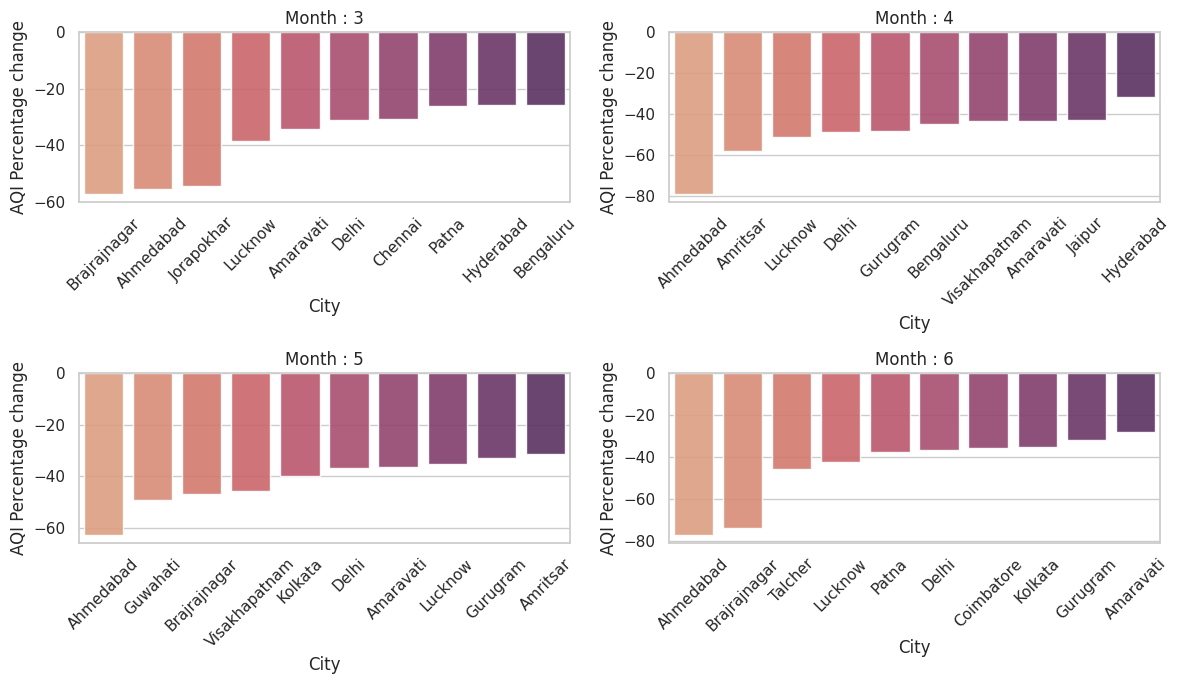

In [ ]:
cities_19_all= cities_group_ym[cities_group_ym['year']==2019]
cities_20_all= cities_group_ym[cities_group_ym['year']==2020]

cities_19_vs_20_all = pd.merge(cities_19_all, cities_20_all, how="inner", on=["City", "month"])
cities_19_vs_20_all['AQI Percentage change']=100*(cities_19_vs_20_all['AQI_y']-cities_19_vs_20_all['AQI_x'])/cities_19_vs_20_all['AQI_x']
months=[3,4,5,6]
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(12, 7))

for i, ax in zip(months, axes.flat):
    cities_AQI_comp=cities_19_vs_20_all[(cities_19_vs_20_all['AQI_y']!= 0.000000) & (cities_19_vs_20_all['month']==i)]
    cities_AQI_comp_10=cities_AQI_comp[['City','month','AQI_x','AQI_y','AQI Percentage change']].sort_values(by='AQI Percentage change', ascending=True).iloc[:10,:]
    
    h=sns.barplot(data=cities_AQI_comp_10, x="City", y='AQI Percentage change', palette="flare", alpha=.9, ax=ax)
    h.set(title='Month : {}'.format(i))
    h.set_xticklabels(h.get_xticklabels(), rotation=45)
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cities which showed an increased AQI as compared to 2019 in the lockdown-months:

In [ ]:
cities_19_vs_20_all[(cities_19_vs_20_all['AQI Percentage change']>=0)&(cities_19_vs_20_all['month'].isin([3,4,5,6]) )][['City','month','AQI_x','AQI_y','AQI Percentage change']].sort_values(by='AQI Percentage change', ascending=False)

,City,month,AQI_x,AQI_y,AQI Percentage change
83,Jorapokhar,6,0.000000,136.533333,inf
125,Thiruvananthapuram,6,28.266667,45.400000,60.613208
60,Guwahati,4,105.933333,127.833333,20.673379
82,Jorapokhar,5,113.709677,135.580645,19.234043
31,Brajrajnagar,4,101.633333,119.533333,17.612332
116,Talcher,4,118.466667,127.733333,7.822172
81,Jorapokhar,4,113.833333,121.400000,6.647145


Guwahati :


<Figure size 640x480 with 0 Axes>

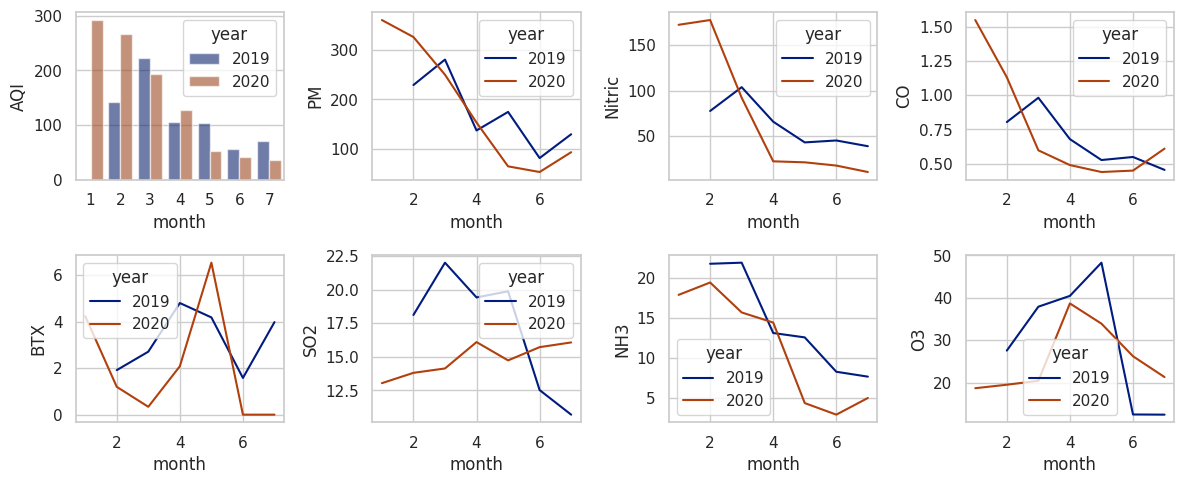

Jorapokhar :


<Figure size 640x480 with 0 Axes>

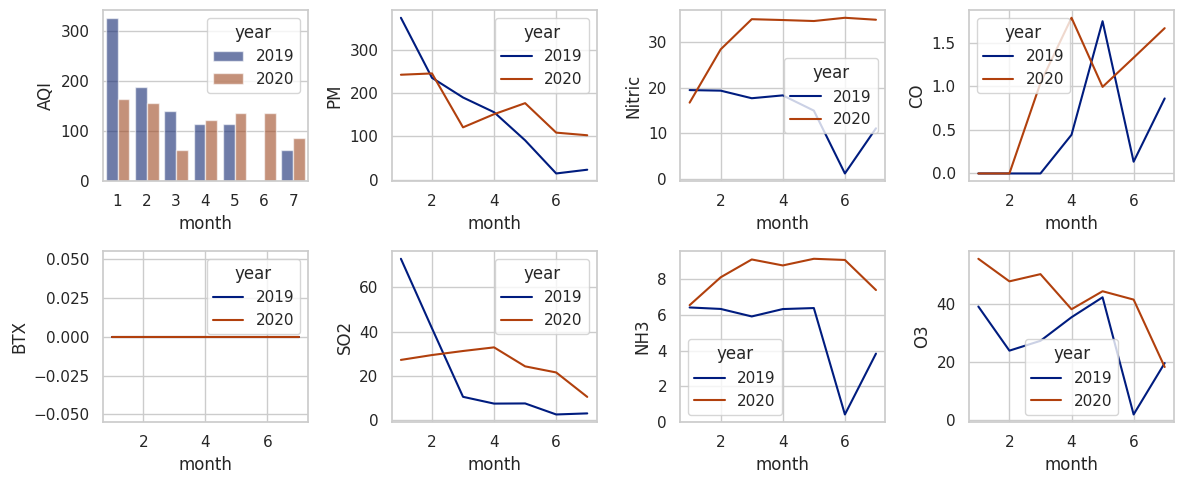

Brajrajnagar :


<Figure size 640x480 with 0 Axes>

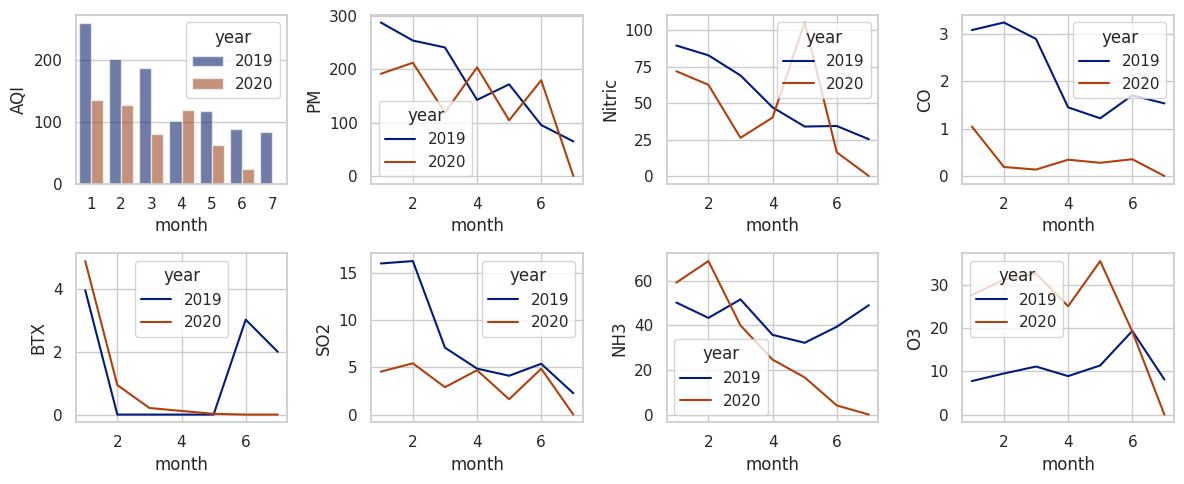

Talcher :


<Figure size 640x480 with 0 Axes>

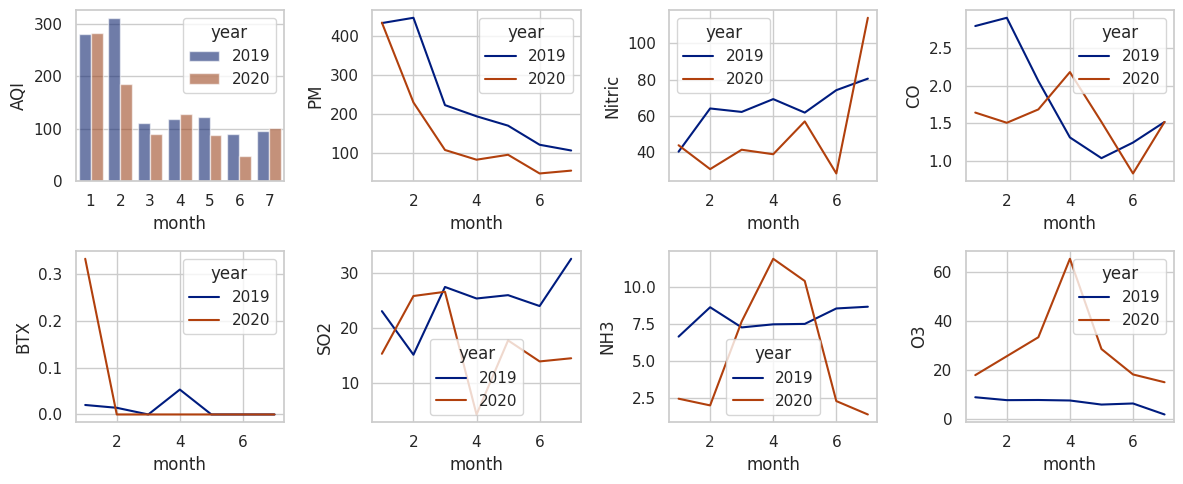

In [ ]:
anomalies=['Guwahati','Jorapokhar','Brajrajnagar','Talcher']

for i in anomalies:
    city_19_20= cities_group_ym[(cities_group_ym['City']==i) & 
                                 (cities_group_ym['year'].isin([2019,2020]))&
                                (cities_group_ym['month']<8)]

    sns.set_theme(style="whitegrid")
    fig = plt.figure()
    fig, axes = plt.subplots(2,4,figsize=(12, 5))
    
    sns.barplot(
        data=city_19_20, 
        x="month", y="AQI", hue="year",
         palette="dark", alpha=.6,ax=axes[0,0]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="PM", hue="year",palette='dark',
        markers=True, dashes=False,ax=axes[0,1]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="Nitric", hue="year",palette='dark',
        markers=True, dashes=False,ax=axes[0,2]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="CO", hue="year",palette='dark',
        markers=True, dashes=False,ax=axes[0,3]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="BTX", hue="year",palette='dark',
        markers=True, dashes=False,ax=axes[1,0]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="SO2", hue="year",palette='dark',
        markers=True, dashes=False,ax=axes[1,1]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="NH3", hue="year",palette='dark',
        markers=True,ax=axes[1,2]
    )
    sns.lineplot(
        data=city_19_20,
        x="month", y="O3", hue="year",palette='dark',
        markers=True, ax=axes[1,3]
    )

    fig.tight_layout()
    print(i,':')
    plt.show()

### Part 2 : Time Series Analysis and Forecasting:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('city_day2.csv')

df['Date'] = pd.to_datetime(df['Date'])

df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.311828
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.284286
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN,258.875688
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN,193.815995
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,193.556272


<Axes: xlabel='Date'>

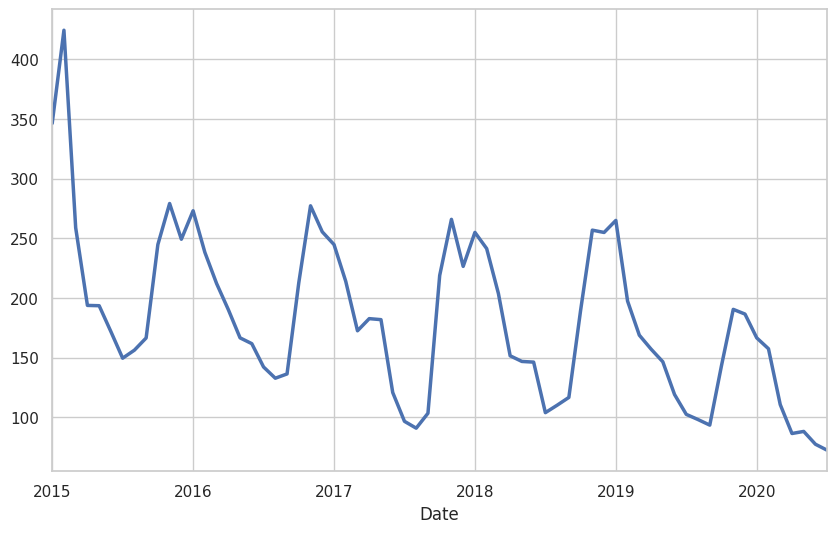

In [ ]:
cities.reset_index()

sns.set_theme(style='whitegrid')

cities['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)

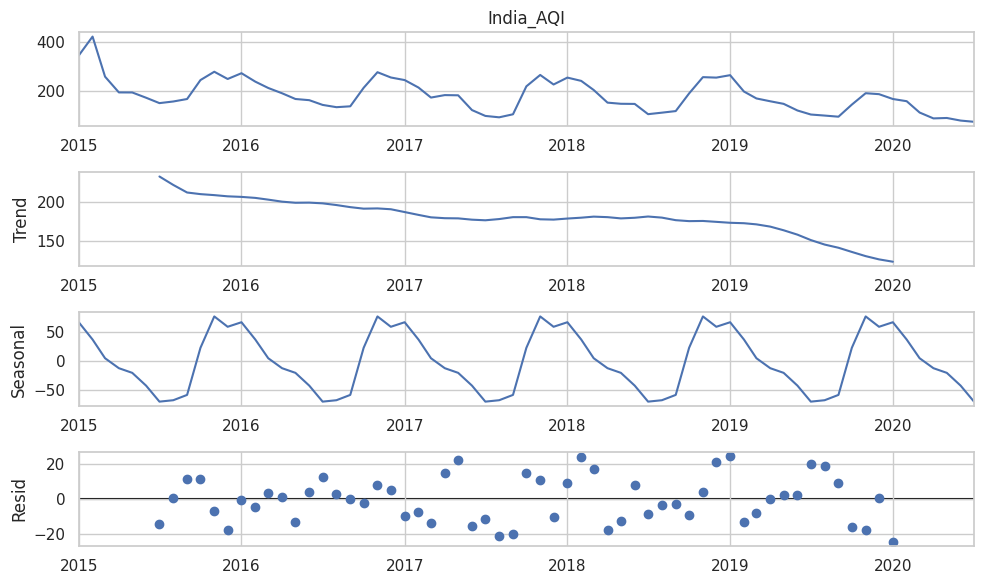

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6);
cities['India_AQI']=cities.mean(axis=1)
fig = seasonal_decompose(cities['India_AQI'], model='additive').plot()

### Augmented Dicky Fuller Test:

In [ ]:
dftest = adfuller(cities['India_AQI'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -0.114224
p-value                         0.948003
#Lags Used                     10.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64

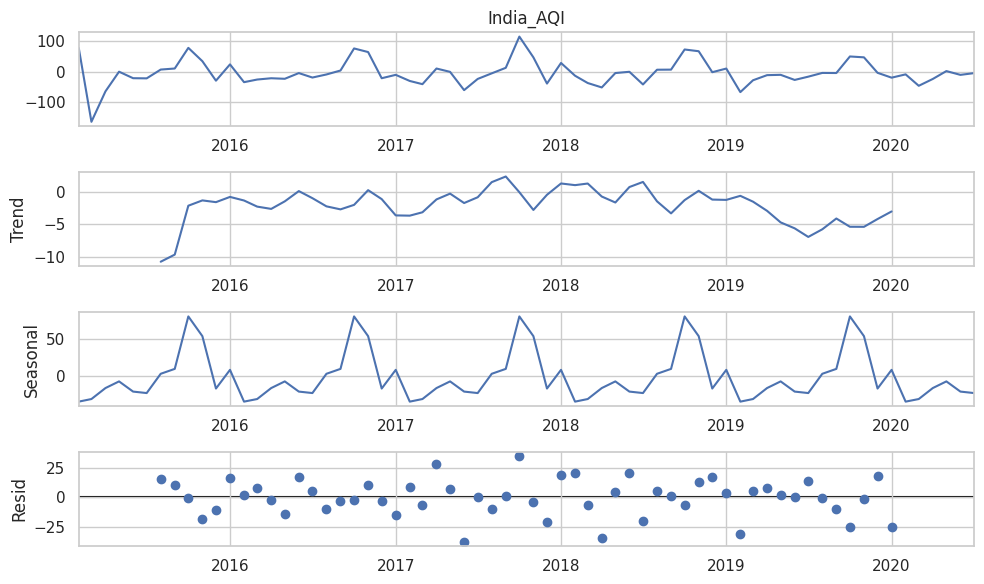

In [ ]:
diff = cities['India_AQI'].diff(periods=1)
diff.dropna(inplace=True)
fig = seasonal_decompose(diff, model='additive').plot()

In [ ]:
dftest = adfuller(diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                -8.385232e+00
p-value                        2.448599e-13
#Lags Used                     9.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64

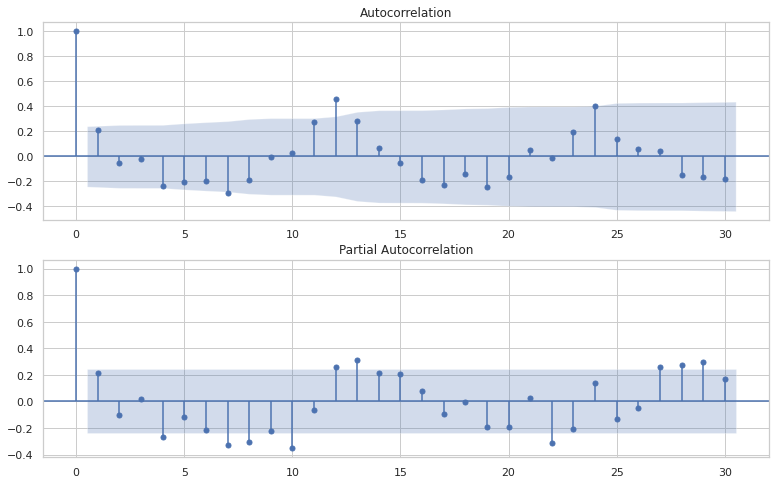

In [ ]:
fig, ax = plt.subplots(2,figsize=(13, 8))
ax[0] = plot_acf(diff, lags=30, ax=ax[0])
ax[1] = plot_pacf(diff,lags=30, ax=ax[1])

In [ ]:
!pip install pmdarima;
from pmdarima import auto_arima;  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.1 MB/s eta 0:00:00


In [ ]:
auto_arima(y=cities['India_AQI'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   67
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -316.908
Date:                              Tue, 16 May 2023   AIC                            643.816
Time:                                      19:01:24   BIC                            654.765
Sample:                                  01-01-2015   HQIC                           648.143
                                       - 07-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0189      0.059      0.320      0.749      -0.097       0.135
ma.L2         -0.8363      0.069    -12.077      0.000      -0.972      -0.701
ar.S.L12       0.9444      0.062     15.221      0.000       0.823       1.066
ma.S.L12      -0.5623      0.229     -2.458      0.014      -1.011      -0.114
sigma2       694.3701    142.982      4.856      0.000     414.130     974.610
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.33   Prob(JB):                         0.22
Heteroskedasticity (H):               0.38   Skew:                            -0.52
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_data=cities['India_AQI'][:'2018-12']
test_data=cities['India_AQI'][:'2019-12']

model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_AQI   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -229.813
Date:                              Sat, 16 Oct 2021   AIC                            469.625
Time:                                      07:17:45   BIC                            478.876
Sample:                                  01-01-2015   HQIC                           473.106
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0644      0.555      0.116      0.908      -1.024       1.152
ma.L2         -0.9323      0.547     -1.703      0.089      -2.005       0.141
ar.S.L12       0.9183      0.097      9.440      0.000       0.728       1.109
ma.S.L12      -0.4473      0.301     -1.485      0.138      -1.038       0.143
sigma2       767.1435    413.405      1.856      0.064     -43.116    1577.403
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.63   Prob(JB):                         0.16
Heteroskedasticity (H):               0.24   Skew:                            -0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

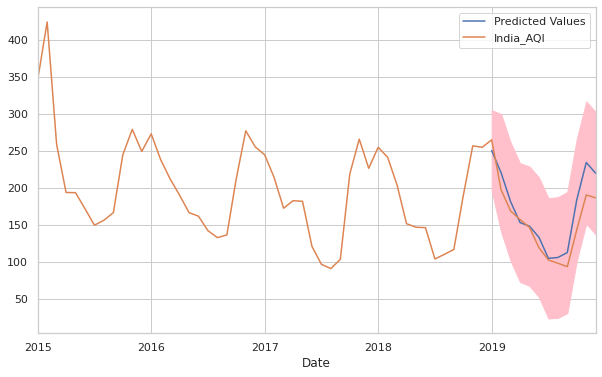

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts = results.get_forecast(steps=12, dynamic=True)

confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

test_data.plot(legend=True, ax=ax)

In [ ]:
from sklearn.metrics import mean_squared_error

test= cities['India_AQI']['2019-01':'2019-12']
RMSE=np.sqrt(mean_squared_error(forecasts.predicted_mean,test))
print('RMSE = ',RMSE)

y_true=test
y_pred= forecasts.predicted_mean
mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE = ', mape)

RMSE =  22.7551159490353
MAPE =  11.640057775135464


<AxesSubplot:xlabel='Date'>

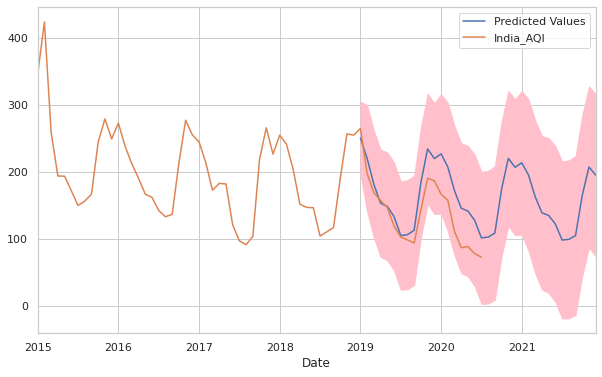

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts = results.get_forecast(steps=36, dynamic=True)

confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

cities['India_AQI'].plot(legend=True, ax=ax)